In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [95]:
titanic = pd.read_csv("Titanic-Dataset.csv")

# Getting the overview of the data

In [96]:
titanic.shape

(891, 12)

In [97]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
296,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S


In [98]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
titanic.duplicated().sum()

0

# Normalising the data

In [102]:
feature_names = ["Pclass", "Sex", "SibSp", "Parch"]
feature = pd.get_dummies(titanic[feature_names])  # this function will convert the categorical variable to numerical
target = titanic["Survived"]

In [103]:
data_scaled = feature.copy()  # This copy will preserve our original feature while applying the scaled transformation
for column in data_scaled.columns:
    data_scaled[column] = (data_scaled[column] - data_scaled[column].mean() ) / data_scaled[column].std(ddof = 0)

# Splitting the data

In [104]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, train_size = 0.80, random_state = 1)

In [105]:
models = []
accuracies = []

# Logistic Regression

In [106]:
model = LogisticRegression()
models.append("Logistic Reg")

In [107]:
model.fit(X_train, y_train)

LogisticRegression()

In [108]:
predictions = model.predict(X_test)
accu = sum(predictions == y_test) / y_test.shape[0] * 100
accuracies.append(accu)

In [109]:
f'Accuracy with Logistic Regression: {accu:.2f} %'

'Accuracy with Logistic Regression: 78.21 %'

# Random Forest

In [110]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
models.append("Random Forest")

In [111]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [112]:
predictions = model.predict(X_test)
accu = sum(predictions == y_test) / y_test.shape[0] * 100
accuracies.append(accu)

In [113]:
f'Accuracy with Random Forest: {accu:.2f} %'

'Accuracy with Random Forest: 75.98 %'

# KNN

In [114]:
model = KNeighborsClassifier(n_neighbors = 7)
models.append("KNN")

In [115]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [116]:
predictions = model.predict(X_test)
accu = sum(predictions == y_test) / y_test.shape[0] * 100
accuracies.append(accu)

In [117]:
f'Accuracy with KNN: {accu:.2f} %'

'Accuracy with KNN: 75.42 %'

# SVM

In [118]:
model = SVC()
models.append("SVM")

In [119]:
model.fit(X_train, y_train)

SVC()

In [120]:
predictions = model.predict(X_test)
accu = sum(predictions == y_test) / y_test.shape[0] * 100
accuracies.append(accu)

In [121]:
f'Accuracy with SVM: {accu:.2f} %'

'Accuracy with SVM: 77.65 %'

# Compairing model Accuracies

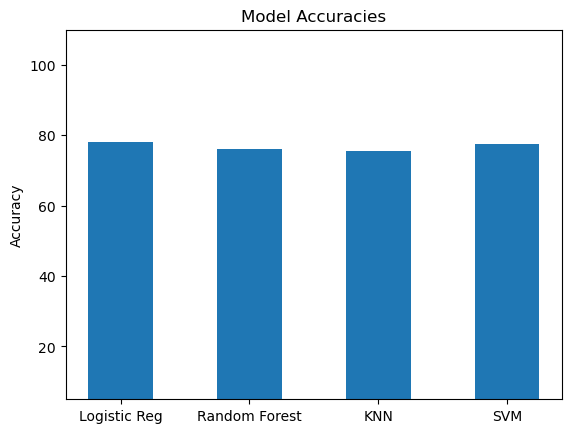

In [122]:
plt.bar(models, accuracies, width = 0.5)
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.ylim(5, 110)
plt.show()